In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/svm_dataset.csv')

In [ ]:
df.head()

,Num_Links,Buy_Now,Capital_Letters,Spam
0,6,1,26,0
1,3,0,1,0
2,7,0,89,1
3,4,1,16,0
4,6,1,32,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Num_Links        200 non-null    int64
 1   Buy_Now          200 non-null    int64
 2   Capital_Letters  200 non-null    int64
 3   Spam             200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,Num_Links,Buy_Now,Capital_Letters,Spam
count,200.000000,200.000000,200.000000,200.000000
mean,4.560000,0.535000,49.225000,0.345000
std,2.899731,0.500025,29.713107,0.476561
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000
50%,5.000000,1.000000,49.500000,0.000000
75%,7.000000,1.000000,73.250000,1.000000
max,9.000000,1.000000,99.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Num_Links,0
Buy_Now,0
Capital_Letters,0
Spam,0


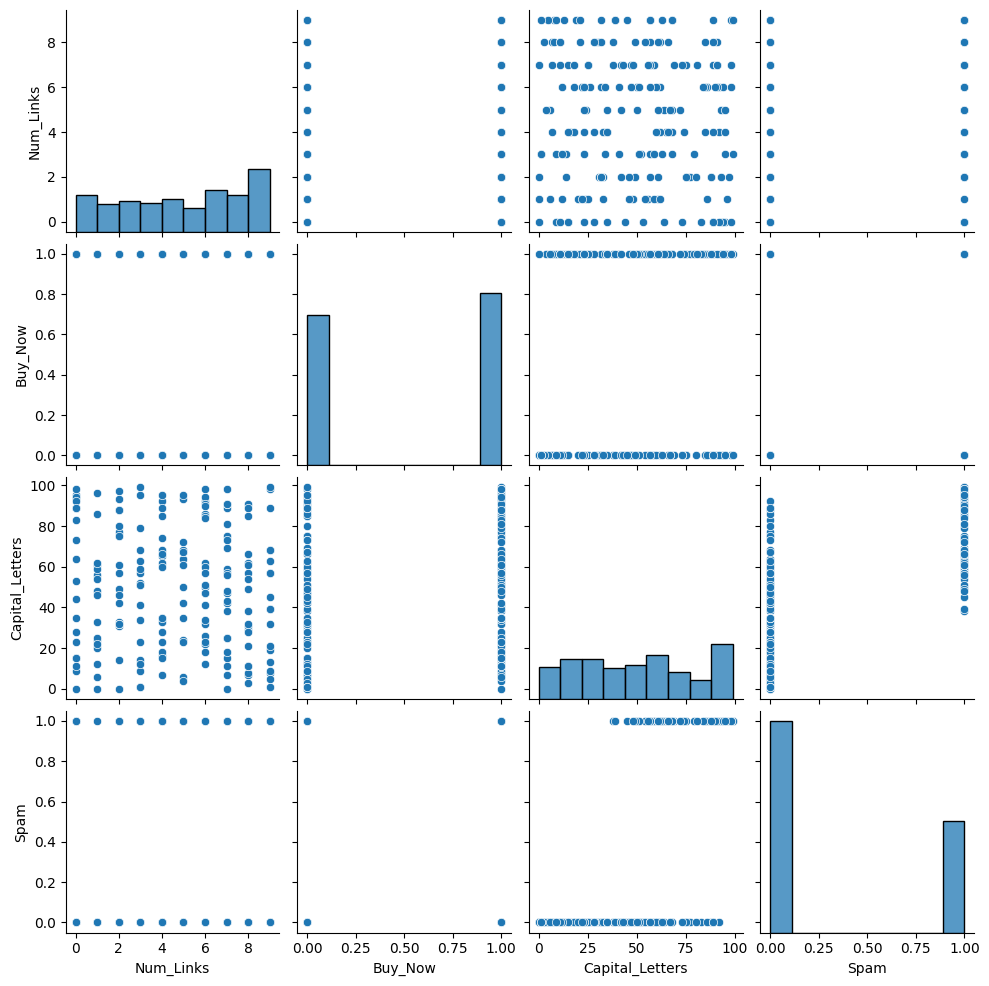

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define features and target
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model (with RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[24  1]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

